# Sosteniblidad
Ayuda me tiene esclavizado wuwn't

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
sostenibilidad = pd.read_csv("datos_sostenibilidad.csv")
ocupacion = pd.read_csv("ocupacion_hotelera.csv")

sostenibilidad

,hotel_nombre,consumo_energia_kwh,residuos_generados_kg,porcentaje_reciclaje,uso_agua_m3,fecha
0,Alletra Diamond Grand Hotel,3077,1821,73.5,4977,2019-01-01
1,ProLiant Towers,2253,1319,71.5,3145,2019-01-01
2,Aruba Luxury Lodge,3824,1672,89.7,4179,2019-01-01
3,InfoSight Boutique Hotel,1701,1070,82.7,4911,2019-01-01
4,Primera Grand,2970,1547,94.6,3907,2019-01-01
...,...,...,...,...,...,...
54795,Alletra Boutique Hotel,1293,1813,84.3,4061,2024-12-31
54796,Simplivity Golden Plaza Hotel,1675,1632,91.6,3290,2024-12-31
54797,Cray Villas,1817,1878,83.8,4688,2024-12-31
54798,Apollo Diamond Suites,2968,1519,76.7,3722,2024-12-31


In [13]:
fila_erronea = sostenibilidad[sostenibilidad['fecha'].str.endswith('d', na=False)]
sostenibilidad.loc[fila_erronea.index, 'fecha'] = sostenibilidad.loc[fila_erronea.index, 'fecha'].str.rstrip('d')
sostenibilidad['fecha'] = pd.to_datetime(sostenibilidad['fecha'], format='%Y-%m-%d')

In [ ]:
sostenibilidad["IndiceVerde"] = (sostenibilidad["consumo_energia_kwh"] * (sostenibilidad["porcentaje_reciclaje"]/100)) / ( sostenibilidad["uso_agua_m3"] + sostenibilidad["residuos_generados_kg"] )
sostenibilidad['fecha'] = pd.to_datetime(sostenibilidad['fecha'])

# 2. Obtener la fecha mínima como referencia
fecha_inicial = sostenibilidad['fecha'].min()

# 3. Crear una nueva columna con la diferencia en días
sostenibilidad['dias'] = (sostenibilidad['fecha'] - fecha_inicial).dt.days

hoteles = sostenibilidad["hotel_nombre"].unique()

result = {"nombre_hotel": hoteles, "slope": [], "intercept": [], "confidence": []}
for hotel in hoteles:
    df = sostenibilidad[sostenibilidad["hotel_nombre"] == hotel]
    
    X, y = df["dias"], df["IndiceVerde"]
    slope, intercept = np.polyfit(df["dias"], df["IndiceVerde"], 1)
    
    df["pred"] = slope * df["dias"] + intercept

    # Calcular el MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((df["IndiceVerde"] - df["pred"]) / df["IndiceVerde"])) * 100
    
    result["slope"].append(slope)
    result["intercept"].append(intercept)
    result["confidence"].append(100-mape)
    
pd.DataFrame(result).to_csv("hotel_analysis.csv")
    

La mayoria de los hoteres al parecer no son eficientes energeticamente ni son verdes al parecer

Existe una desviación ideal de 0.5566264950329041


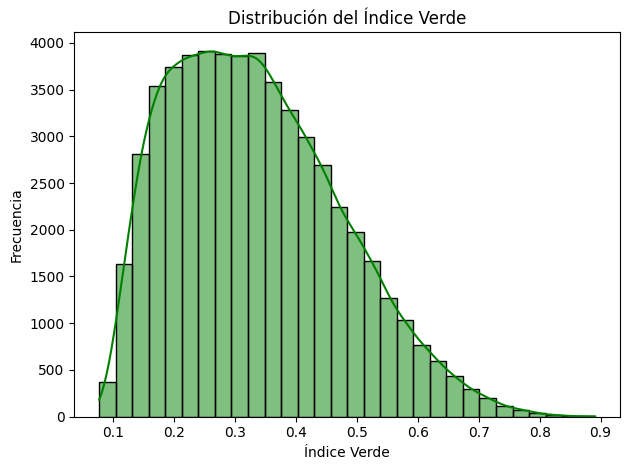

In [ ]:
sns.histplot(data=sostenibilidad, x='IndiceVerde', kde=True, bins=30, color='green')

# Personalizar
plt.title('Distribución del Índice Verde')
plt.xlabel('Índice Verde')
plt.ylabel('Frecuencia')
plt.tight_layout()

print(f"Existe una desviación ideal de {sostenibilidad["IndiceVerde"].max() - sostenibilidad["IndiceVerde"].mean()}")

In [ ]:
ocupacion["RatioDeIngreso"] = ( (ocupacion["reservas_confirmadas"] + ocupacion["tasa_ocupacion"]) / ocupacion["cancelaciones"] ) * ocupacion["precio_promedio_noche"]
ocupacion.to_csv("ocupacion_hotelera.csv")

,hotel_nombre,RatioDeIngreso
0,Alletra Diamond Grand Hotel,2491.826000
1,ProLiant Towers,1330.860000
2,Aruba Luxury Lodge,1860.357778
3,InfoSight Boutique Hotel,2106.353636
4,Primera Grand,797.930769
...,...,...
54795,Alletra Boutique Hotel,1450.462857
54796,Simplivity Golden Plaza Hotel,916.151429
54797,Cray Villas,881.919474
54798,Apollo Diamond Suites,1602.830370


Existe una desviación ideal de 0.5566264950329041


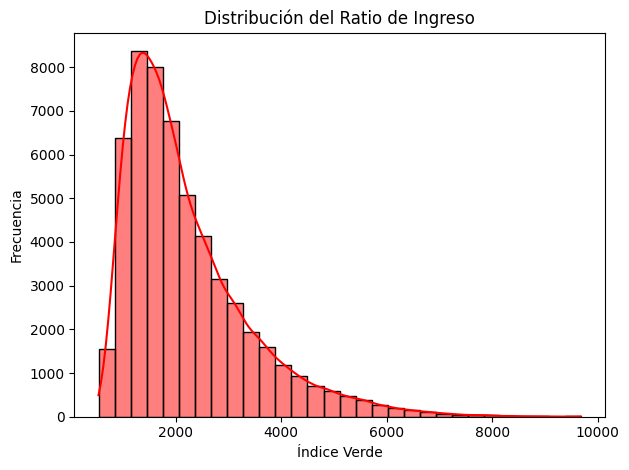

In [ ]:
sns.histplot(data=ocupacion, x='RatioDeIngreso', kde=True, bins=30, color='red')

# Personalizar
plt.title('Distribución del Ratio de Ingreso')
plt.xlabel('Índice Verde')
plt.ylabel('Frecuencia')
plt.tight_layout()

print(f"Existe una desviación ideal de {sostenibilidad["IndiceVerde"].max() - sostenibilidad["IndiceVerde"].mean()}")

In [ ]:
ocupacion["hotel_nombre"].value_counts()

hotel_nombre
Alletra Diamond Grand Hotel                2192
ProLiant Towers                            2192
Aruba Luxury Lodge                         2192
InfoSight Boutique Hotel                   2192
Primera Grand                              2192
dHCI Executive Boutique Hotel              2192
ProLiant Haven                             2192
Apollo Executive Beach Resort              2192
Aruba Lodge                                2192
Alletra Haven                              2192
dHCI Platinum Beach Resort                 2192
GreenLake Platinum Heritage Inn            2192
Pointnext Signature Residences & Suites    2192
ProLiant Place                             2192
Synergy Golden Grand Hotel                 2192
Alletra Resort                             2192
GreenLake Digital Business Suites          2192
Apollo Resort & Spa                        2192
Nimble Inn                                 2192
Ezmeral Grand Hotel                        2192
Alletra Boutique Hotel     